In [1]:
import utils, data, simulation
import os
import os.path as op
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
checkAxon = True
drawAllDist = False

In [3]:
#where the data is
datapath = os.environ['VISCOG_DATA']
#folder containing scripts
scriptpath = os.environ['ACS_DATA']
outpath = op.join(scriptpath, 'data')
filename = 'S_12-005_12-104_13-101__collated_both_sessions.csv'


data = data.processing()
(double_x2, catch, subjectdata) = data.get_two_point(outpath, scriptpath, filename)

In [4]:
simulations = simulation.get_sims(subjectdata)
subjects = subjectdata.index

In [5]:
subjectdata

,implant_rot,implant_type,implant_type_str,implant_x,implant_y,loc_od_x,loc_od_y,viscog_subject_id,xmax,xmin,ymax,ymin,eye,session,rho,lambda,scale
subject_id,,,,,,,,,,,,,,,,,
12-005,-0.49500,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-1331.0000,-850.0000,16.200000,1.380000,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_29,315.00,500.0,0.5
12-104,-0.35500,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-515.0000,108.0000,18.500000,2.620000,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_30,1887.69,10.0,0.5
13-101,-0.67358,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-965.1227,429.0195,15.055678,1.821214,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_31,1127.00,717.0,0.5


## Figure 5


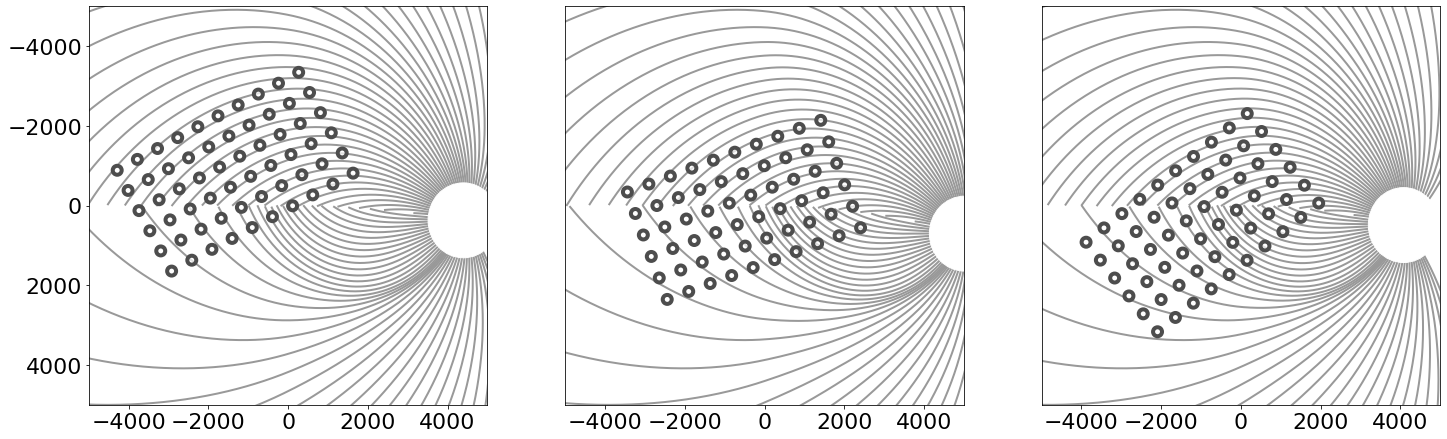

In [6]:
from pulse2percept import viz as viz
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size'   : 22})

plt.rcParams.update({'font.size'   : 22})
xlim = (-5000,5000)
ylim = (-5000,5000)
fig, ax = plt.subplots(1,3, figsize = (20,12))
fig.tight_layout(pad=0.5)
i = 0 
for subject in subjects:
    viz.plot_implant_on_axon_map(simulations.loc[subject, 'implant'], 
                                 loc_od =(subjectdata.loc[subject, 'loc_od_x'],subjectdata.loc[subject, 'loc_od_y']),
                                 ax= ax[i], xlim= xlim, ylim= ylim,
                                 annotate_implant=False, annotate_quadrants= False, 
                                 upside_down=True)
    ax[i].set_title('')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

    if i>0:
        ax[i].set_ylabel('')
        ax[i].axes.yaxis.set_visible(False)
    i+=1
    
plt.savefig(op.join(outpath,'figures', 'implants.svg'), format='svg', bbox_inches = 'tight', pad_inches=1)
plt.savefig(op.join(outpath,'figures', 'implants.tif'), format='tif', bbox_inches = 'tight', pad_inches=1)


## Figure 6

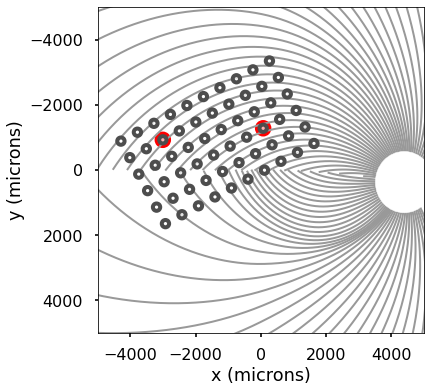

In [30]:
from pulse2percept import viz as viz
from matplotlib import rc

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size'   : 22})
#rc('text', usetex=True)
fig, ax = plt.subplots(1,1, figsize = (8,6))
subject= '12-005'
viz.plot_implant_on_axon_map( simulations.loc[subject, 'implant'], upside_down=True, xlim=[-5000,5000], ylim=[-5000,5000],
                                 loc_od =(subjectdata.loc[subject, 'loc_od_x'],subjectdata.loc[subject, 'loc_od_y']),
                                 ax= ax,     annotate_implant=False, 
                                annotate_quadrants=False)
ax.set_title('')
plt.savefig(op.join(outpath,'figures', 'implant_ud.png'), format='png')
plt.savefig(op.join(outpath,'figures', 'implant_stim.svg'), format='svg', bbox_inches = 'tight', pad_inches=1)
plt.savefig(op.join(outpath,'figures', 'implant_stim.tif'), format='tif', bbox_inches = 'tight', pad_inches=1)

In [8]:
subjectdata

,implant_rot,implant_type,implant_type_str,implant_x,implant_y,loc_od_x,loc_od_y,viscog_subject_id,xmax,xmin,ymax,ymin,eye,session,rho,lambda,scale
subject_id,,,,,,,,,,,,,,,,,
12-005,-0.49500,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-1331.0000,-850.0000,16.200000,1.380000,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_29,315.00,500.0,0.5
12-104,-0.35500,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-515.0000,108.0000,18.500000,2.620000,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_30,1887.69,10.0,0.5
13-101,-0.67358,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-965.1227,429.0195,15.055678,1.821214,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_31,1127.00,717.0,0.5


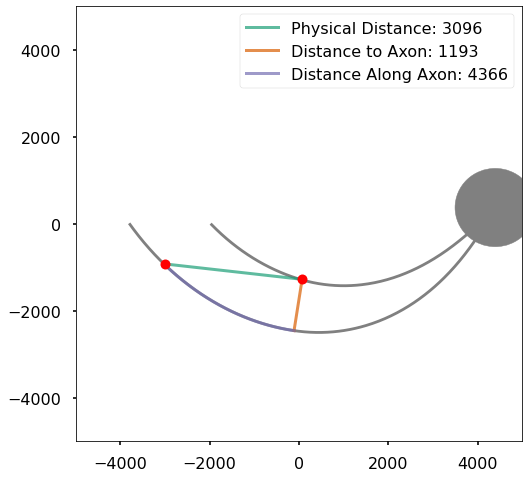

In [9]:
plt.style.use(['seaborn-poster'])
row = double_x2.loc[37]
bi_dists = utils.get_axonal_distances(row, 'bidirectonal', simulations= simulations)

cmap = plt.get_cmap('Dark2')
fig, ax = plt.subplots(1,1, figsize=(8, 8))

utils.plot_distances(np.transpose(bi_dists), ax)
plt.savefig(op.join(outpath,'figures', 'distances_ud.png'), format='png')

/mnt/home/yucel/p2p/lib/python3.8/site-packages/pulse2percept/percepts/base.py:165: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, np.flipud(frame), cmap=cmap, vmin=vmin,


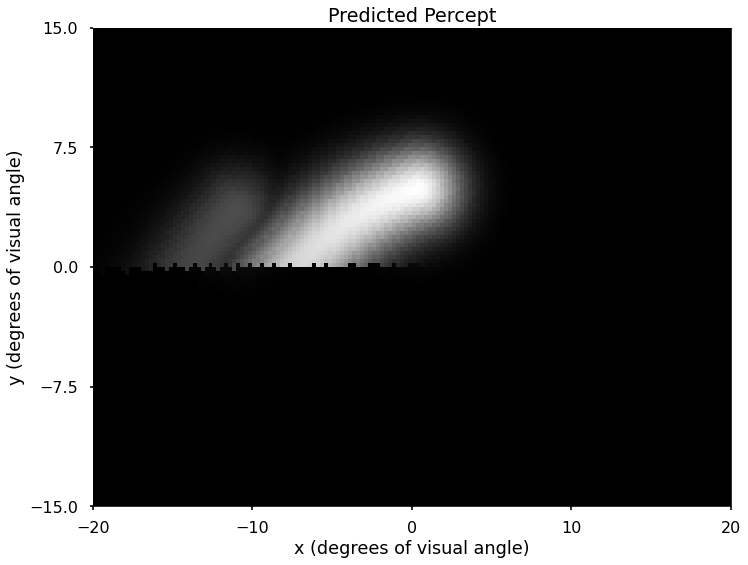

In [10]:
model =  simulations.loc[row['subject_id'],'axonmap']
argus = simulations.loc[row['subject_id'],'implant']

argus.stim = {row['pts_electrode1']: row['pts_amp1'], row['pts_electrode2']:row['pts_amp2']}
model.set_params({'rho':500})
percept= model.predict_percept(argus)
ax = percept.plot()
ax.set_title('Predicted Percept')
plt.savefig(op.join(outpath,'figures', 'percept.png'), format='png')

In [11]:
viz.plot_implant_on_axon_map( simulations.loc[subject, 'implant'], upside_down=True, xlim=[-5000,5000], ylim=[-5000,5000],
                                 loc_od =(subjectdata.loc[subject, 'loc_od_x'],subjectdata.loc[subject, 'loc_od_y']),
                                 ax= ax,     annotate_implant=False,
                                annotate_quadrants=True)

<AxesSubplot:title={'center':"ArgusII(earray=ElectrodeGrid, eye='RE', shape=(6, 10), \n        stim=Stimulus)"}, xlabel='x (microns)', ylabel='y (microns)'>

## Distance Correlations


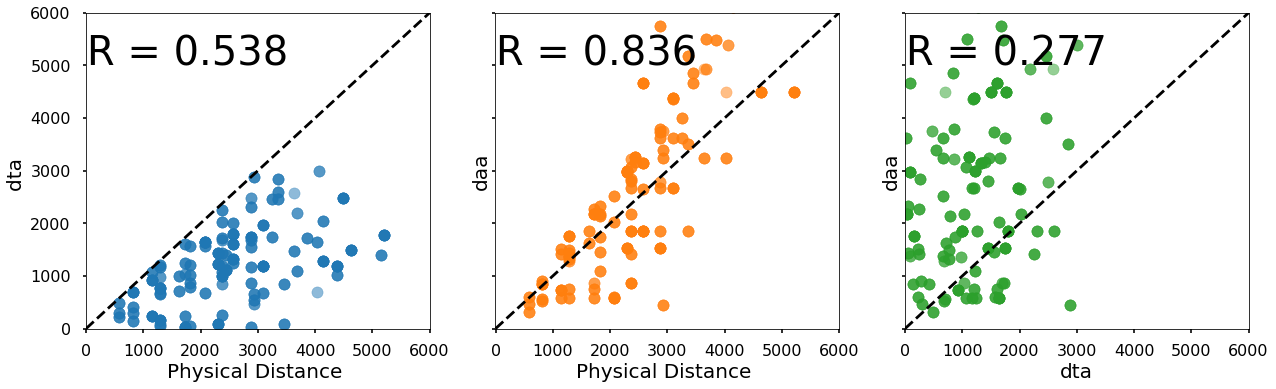

In [18]:

labelsize=20
## import matplotlib.pyplot as plt
%matplotlib inline 
cmap = plt.get_cmap('tab10')
col = cmap.colors[2]

fig,axes = plt.subplots(1,3, figsize=(18,6), sharex= True, sharey=True)
fig.tight_layout(pad=4)

axes[0].plot([0,6000],[0,6000],'k--')
axes[1].plot([0,6000],[0,6000],'k--')
axes[2].plot([0,6000],[0,6000],'k--')

#axes[0].plot([xval,yval],[xval,yval],'k--')
#axes[1].plot([xval,yval],[xval,yval],'k--')
#axes[2].plot([xval,yval],[xval,yval],'k--')


axes[0].scatter(double_x2['electrode_distance'], double_x2['dta_bi'], c = cmap.colors[0], alpha=0.5)

axes[0].set_xlabel('Physical Distance ', size=labelsize)
axes[0].set_ylabel('dta ', size=labelsize)
axes[0].set_xlim([-10,6000])
axes[0].set_ylim([-10,6000])

axes[1].scatter(double_x2['electrode_distance'], double_x2['daa_bi'], c = cmap.colors[1],alpha=0.5)
axes[1].set_xlabel('Physical Distance ', size=labelsize)
axes[1].set_ylabel('daa', size=labelsize)

axes[2].scatter(double_x2['dta_bi'], double_x2['daa_bi'],alpha=0.5,c = cmap.colors[2] )
axes[2].set_xlabel('dta', size=labelsize)

axes[2].set_ylabel('daa', size=labelsize)

axes[0].annotate('R = %4.3f' %np.corrcoef((double_x2['electrode_distance'], double_x2['dta_bi']))[0,1], (10,5000), size =40)
axes[1].annotate('R = %4.3f' %np.corrcoef((double_x2['electrode_distance'], double_x2['daa_bi']))[0,1], (10,5000), size =40)
axes[2].annotate('R = %4.3f' %np.corrcoef((double_x2['daa_bi']), (double_x2['dta_bi']))[0,1], (10,5000), size =40)
plt.savefig(op.join(outpath,'figures', 'inset_corr.png'), format='png')

In [19]:
import scipy.stats as sp

In [20]:
r_table = pd.DataFrame()
r_table = r_table.append({'Type': 'Physical Distance - Distance To Axon', 'Pearson Correlation Coefficient': sp.pearsonr(double_x2['electrode_distance'], double_x2['dta_bi'])[0], 'p-value': sp.pearsonr(double_x2['electrode_distance'], double_x2['dta_bi'])[1]}, ignore_index=True)
r_table = r_table.append({'Type': 'Physical Distance - Distance Along Axon', 'Pearson Correlation Coefficient': sp.pearsonr(double_x2['electrode_distance'], double_x2['daa_bi'])[0], 'p-value': sp.pearsonr(double_x2['electrode_distance'], double_x2['daa_bi'])[1]}, ignore_index=True)
r_table = r_table.append({'Type': 'Distance Along Axon - Distance To Axon', 'Pearson Correlation Coefficient': sp.pearsonr(double_x2['daa_bi'], double_x2['dta_bi'])[0], 'p-value': sp.pearsonr(double_x2['daa_bi'], double_x2['dta_bi'])[1]}, ignore_index=True)

In [21]:
r_table.set_index('Type')

,Pearson Correlation Coefficient,p-value
Type,,
Physical Distance - Distance To Axon,0.537831,8.263028e-27
Physical Distance - Distance Along Axon,0.835952,7.910507e-90
Distance Along Axon - Distance To Axon,0.276674,2.258581e-07
